# Tutorial 3 : Cadeia J1-J2 AFM frustrada

Estrutura cristalina, ligação mais curta ao longo do eixo a, átomos magnéticos de Cu+ com spin S=1.

> In spinw/genlattice (line 127)
Rede magnética:

ans =

  1x4 table

     matom     idx    S        pos    
    _______    ___    _    ___________

    {'Cu1'}     1     1    0    0    0

Creating 3D plot... 
> In swplot.figure (line 142)
In swplot.activefigure (line 71)
In spinw/plot (line 150)
...3k faces and 2k vertices are drawn!



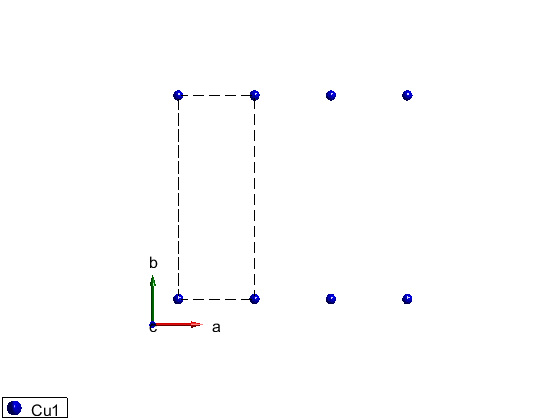

In [50]:
% Define a rede para a cadeia J1-J2 AFM frustrada com os seguintes parâmetros:
% - Constantes da rede: [3 8 10]
% - Ângulos da rede: [90 90 90]
% - Grupo espacial: 0 (sem simetria)
J1J2chain = spinw; 
J1J2chain.genlattice('lat_const', [3 8 10], 'angled', [90 90 90], 'spgr', 0); 

% Adiciona um átomo com coordenadas (0, 0, 0) e spin S=1 à rede.
J1J2chain.addatom('r', [0 0 0], 'S', 1, 'label', 'Cu1', 'color', 'blue'); 

% Exibe a tabela dos átomos na rede magnética.
disp('Rede magnética:')
J1J2chain.table('atom') 

% Plota a rede magnética com os limites de visualização especificados.
plot(J1J2chain, 'range', [3 1 1], 'zoom', 0.5)


### Acoplamentos

Acoplamentos antiferromagnéticos de primeiro e segundo vizinhos. Se o nome da matriz terminar com '-', a ligação será traçada com linha tracejada.

Creating the bond list (maxDistance = 7 Å, nCell = 3x1x1)...
...2 bonds are retained out of 36 generated!
Ligações:

ans =

  2x10 table

    idx    subidx        dl             dr         length    matom1     idx1    matom2     idx2                    matrix                
    ___    ______    ___________    ___________    ______    _______    ____    _______    ____    ______________________________________

     1       1       1    0    0    1    0    0      3       {'Cu1'}     1      {'Cu1'}     1      {0x0 char}    {0x0 char}    {0x0 char}
     2       1       2    0    0    2    0    0      6       {'Cu1'}     1      {'Cu1'}     1      {0x0 char}    {0x0 char}    {0x0 char}

Creating 3D plot... 
> In swplot.figure (line 142)
In swplot.activefigure (line 71)
In spinw/plot (line 150)
...2k faces and 1k vertices are drawn!



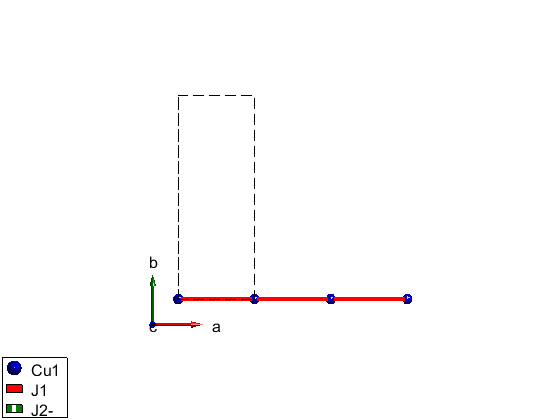

In [53]:
% Calcula os acoplamentos antiferromagnéticos de primeiro e segundo vizinhos
% com uma distância máxima de 7 unidades de célula.
J1J2chain.gencoupling('maxDistance', 7); 

% Exibe a tabela de ligações na rede magnética.
disp('Ligações:')
J1J2chain.table('bond', []) 

% Adiciona matrizes de acoplamento J1 e J2 à rede magnética.
J1J2chain.addmatrix('label', 'J1', 'value', -1, 'color', 'red'); 
J1J2chain.addmatrix('label', 'J2-', 'value', 2, 'color', 'green'); 

% Associa as matrizes de acoplamento às ligações na rede magnética.
J1J2chain.addcoupling('mat', 'J1', 'bond', 1); 
J1J2chain.addcoupling('mat', 'J2-', 'bond', 2); 

% Plota a rede magnética com os acoplamentos representados como linhas.
plot(J1J2chain, 'range', [3 0.9 0.9], 'bondMode', 'line', 'bondLinewidth0', 3)


### A estrutura magnética é uma hélice

Pode-se usar dois métodos diferentes para definir a estrutura magnética do estado fundamental:

#### Entrada direta

Se a solução exata do hamiltoniano de spin for conhecida, podería-se inseri-la, assumindo uma hélice com os seguintes parâmetros:

- vetor de onda de ordenação magnética k = (1/4 0 0)
- Spins S em um plano arbitrário, primeiro spin S = (1 0 0)
- normal ao plano da hélice de spin tem que ser perpendicular a S, escolhe-se n = (0 0 1)
não é necessário usar uma supercélula magnética

Estrutura magnética:

ans =

  1x8 table

    num     matom     idx    S     realFhat       imagFhat          pos               kvect        
    ___    _______    ___    _    ___________    ___________    ___________    ____________________

     1     {'Cu1'}     1     1    1    0    0    0    1    0    0    0    0    0.25       0       0

Energia do estado fundamental antes da otimização:
Ground state energy: -2.000 meV/spin.
Creating 3D plot... 
> In swplot.figure (line 142)
In swplot.activefigure (line 71)
In spinw/plot (line 150)
...3k faces and 1k vertices are drawn!



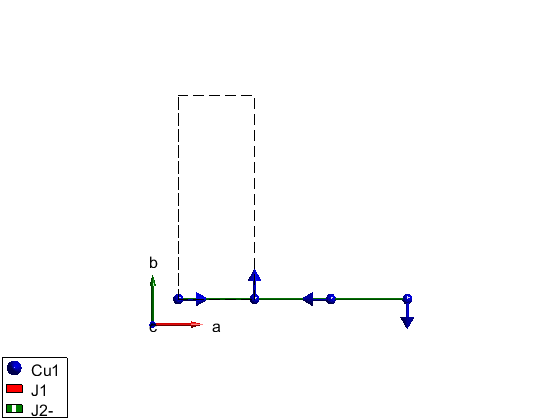

In [71]:
J1J2chain.genmagstr('mode', 'helical', 'k', [0.25 0 0], 'n', [0 0 1], 'S', [1; 0; 0], 'nExt', [1 1 1])

% Exibe a tabela da estrutura magnética.
disp('Estrutura magnética:')
J1J2chain.table('mag') 

% Calcula a energia do estado fundamental antes da otimização.
disp('Energia do estado fundamental antes da otimização:')
J1J2chain.energy 

% Plota a rede magnética com a estrutura magnética definida.
plot(J1J2chain, 'range', [3 0.9 0.9])

### Otimiza-se o ângulo de inclinação da hélice


Não se tem a certeza sobre o ângulo de inclinação correto da hélice, por isso pretende-se calculá-lo. O sw.optmagstr() é capaz de determinar o estado magnético fundamental. Ele usa uma função de restrição (@gm_planar neste caso) para reduzir o número de parâmetros que devem ser otimizados. Funciona bem se o número de parâmetros livres for baixo. resulta que o vetor k correto é 0,2301.

                                        
 10.00%, remained: 000:00:00 (HH:MM:SS).
 20.00%, remained: 000:00:00 (HH:MM:SS).
 30.00%, remained: 000:00:00 (HH:MM:SS).
 40.00%, remained: 000:00:00 (HH:MM:SS).
 50.00%, remained: 000:00:00 (HH:MM:SS).
 60.00%, remained: 000:00:00 (HH:MM:SS).
 70.00%, remained: 000:00:00 (HH:MM:SS).
 80.00%, remained: 000:00:00 (HH:MM:SS).
 90.00%, remained: 000:00:00 (HH:MM:SS).
100.00%, remained: 000:00:00 (HH:MM:SS).
Calculation is finished in 00:00:00 (hh:mm:ss).
Energia do estado fundamental após otimização:
Ground state energy: -2.062 meV/spin.
Estrutura magnética otimizada:

ans =

  1x8 table

    num     matom     idx    S     realFhat       imagFhat          pos                    kvect            
    ___    _______    ___    _    ___________    ___________    ___________    _____________________________

     1     {'Cu1'}     1     1    1    0    0    0    1    0    0    0    0    0.23005          0          0

Creating 3D plot... 
> I

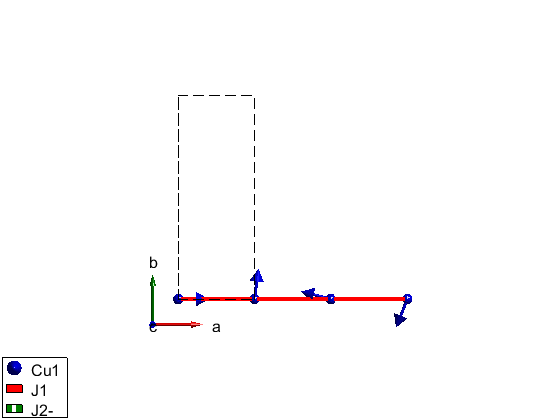

In [75]:
x1 = [0 0 0 0 0 0]; 
x2 = [0 0.5 0 0 0 0]; 
optRes = J1J2chain.optmagstr('func', @gm_planar, 'xmin', x1, 'xmax', x2, 'nRun', 10); 

% Calcula a energia do estado fundamental após a otimização.
disp('Energia do estado fundamental após otimização:')
J1J2chain.energy 

% Exibe a tabela da estrutura magnética otimizada.
disp('Estrutura magnética otimizada:')
J1J2chain.table('mag') 

% Plota a rede magnética com a estrutura magnética otimizada.
plot(J1J2chain, 'range', [3 0.9 0.9], 'bondMode', 'line', 'bondLinewidth0', 3)

### Espectro de onda de spin

Calcula-se o espectro da onda de spin, o código usa automaticamente o método que permite o cálculo da onda de spin de estruturas incomensuráveis sem criar uma supercélula magnética. Existem três modos de onda de spin: ômega(Q), ômega(Q+/-k). Os dois deslocados se devem à estrutura incomensurável.

Calculating INCOMMENSURATE spin wave spectra (nMagExt = 1, nHkl = 1200, nTwin = 1)...
No magnetic form factor is included in the calculated structure factor.
No g-tensor is included in the calculated structure factor.
                                        
100.00%, remained: 000:00:00 (HH:MM:SS).
Calculation is finished in 00:00:00 (hh:mm:ss).
Calculation finished.



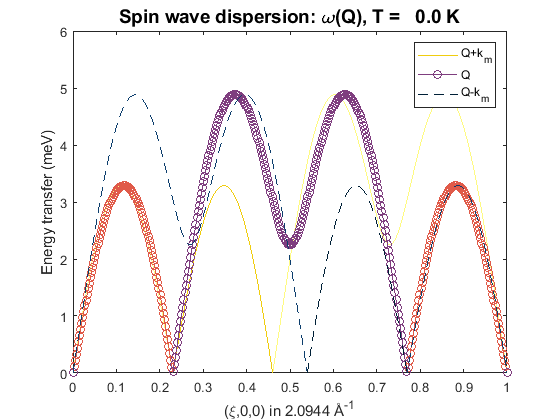

In [79]:
% Calcula o espectro de ondas giratórias para a cadeia J1-J2 AFM frustrada, usando os seguintes vetores de onda:
% {[0 0 0], [1 0 0]} e um número máximo de pontos de energia igual a 400. A opção 'hermit' indica que os cálculos
% são realizados no espaço recíproco.
J1J2spec = J1J2chain.spinwave({[0 0 0] [1 0 0] 400}, 'hermit', false);

% Converte o espectro de ondas giratórias para unidades de seção de espalhamento de nêutrons.
J1J2spec = sw_neutron(J1J2spec);

% Gera uma grade de energia para o espectro de ondas giratórias.
J1J2spec = sw_egrid(J1J2spec, 'Evect', linspace(0, 6.5, 100));

% Cria uma nova figura.
figure

% Plota o espectro de ondas giratórias.
sw_plotspec(J1J2spec, 'mode', 1, 'colorbar', false)

% Define os limites dos eixos.
axis([0 1 0 6])
